from google.colab import drive
drive.mount('/content/drive')

In [66]:
#!pip install holisticai[all]

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Settings
np.random.seed(0)
import warnings
warnings.filterwarnings("ignore")

In [68]:
columns_list = ['income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_purpose', 'loan_to_value_ratio', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex','applicant_age', 'action_taken']

#columns_list = ['loan_purpose', 'loan_amount', 'action_taken', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'lien_status',


#  'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_type', 'loan_purpose', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'action_taken']


int_types = ['applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'action_taken']
float_types=['loan_amount','loan_to_value_ratio', 'interest_rate', 'rate_spread', 'income', 'debt_to_income_ratio', 'loan_to_value_ratio']

object_types=[]

data = pd.read_csv("state_CA.csv", usecols= columns_list)



In [69]:
len(columns_list)

33

In [70]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'applicant_age'],
      dtype='object')

In [71]:
columns_to_check_for_na = ['county_code', 'census_tract', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'property_value', 'construction_method',
       'occupancy_type', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']

data= data.dropna(subset=columns_to_check_for_na)


In [72]:
data = data[data!= 'Exempt']
data = data[data!= '1111']
data = data[data!= 1111]
data = data[data!= '8888']
data = data[data!= 8888]

In [73]:
data = data[data!= 'NaN']
data = data[data!= 'nan']

In [74]:
# Update action_taken values
data['action_taken'] = data['action_taken'].replace({1: 1, 2: 1, 3: 0, 7: 0})

# Drop rows with action_taken values of 4, 5, 6, or 8
data = data[~data['action_taken'].isin([4, 5, 6, 8])]
data = data[~data['applicant_ethnicity-1'].isin([3, 4])]
data = data[~data['applicant_sex'].isin([3, 4, 6])]



In [75]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
0    32992
1    31881
Name: count, dtype: int64


In [76]:
data['debt_to_income_ratio']= data['debt_to_income_ratio'].replace({
    '<20%': '0',
    '>60%': '60',

    '30%-<36%': '30',
    '20%-<30%': '20',
    '50%-60%': '50'
})

num_elements_per_range = min(data['debt_to_income_ratio'].value_counts())



In [77]:

replacement_ranges = {
    '37': [37,38,39,40,41,42],
    '43': [43,44,45,46,47,48,49],
}

for key,value in replacement_ranges.items():
  selected_rows= data['debt_to_income_ratio'].astype(float).between(min(value), max(value))
  data.loc[selected_rows, 'debt_to_income_ratio'] = key



In [78]:
print(data['debt_to_income_ratio'].head(50))

54108     NaN
54116     NaN
54131     NaN
54139     NaN
64997      50
65587      50
65619      43
65778      30
65834      37
65915      30
65968      43
66011      30
66133      30
66171      60
66239      20
66308      20
126778     20
126783      0
126789     43
126790     36
126792     43
126793     37
126796     43
126797     43
126798     37
126802     20
126806     37
126807     20
126810     60
126813     37
126816     43
126820     30
126821     43
126826     36
126831     20
126835     43
126837     43
126839     20
126842      0
126845     30
126847     37
126850     37
126852      0
126856     30
126857     60
126859     30
126860     60
126862     37
126865     20
126870     30
Name: debt_to_income_ratio, dtype: object


In [79]:
for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 2, 21:2, 22:2, 23:2, 24:2, 25:2, 26:2, 27:2, 3: 3, 4: 4, 41:4, 42: 4, 43: 4, 44: 4})

for i in range(1, 6):
        race_col = f'applicant_ethnicity-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 0, 11:1, 12:1, 13:1, 14:1})

data['applicant_ethnicity'] = (data[['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5']].sum(axis=1) >= 1).astype(int) + 1
data.drop(['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5'],  axis=1, inplace=True)


In [80]:
data

,county_code,census_tract,action_taken,preapproval,loan_purpose,lien_status,loan_amount,loan_to_value_ratio,loan_term,prepayment_penalty_term,...,applicant_credit_score_type,co-applicant_credit_score_type,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,applicant_sex,applicant_age,applicant_ethnicity
54108,6085.0,6.085504e+09,1,2,1,1,1085000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,35-44,1
54116,6059.0,6.059063e+09,1,2,1,1,1955000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,35-44,1
54131,6037.0,6.037262e+09,1,2,1,1,3045000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
54139,6059.0,6.059063e+09,1,2,1,1,2625000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
64997,6085.0,6.085508e+09,1,2,1,1,1725000.0,65.0,360.0,18.0,...,9.0,10.0,2.0,NaN,NaN,NaN,NaN,1,45-54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547658,6071.0,6.071002e+09,1,2,1,1,395000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547660,6059.0,6.059052e+09,1,2,1,1,1025000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,25-34,1
1547661,6037.0,6.037403e+09,1,2,1,1,545000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547662,6037.0,6.037431e+09,1,2,32,1,875000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,45-54,1


In [81]:
def combine_race(row):
    races = []
    for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        if pd.notna(row[race_col]) and row[race_col] in [1,2,3,4,5]:
            races.append(row[race_col])
    return races


In [82]:
from sklearn.preprocessing import MultiLabelBinarizer

app_race = data.apply(combine_race, axis=1)
mlb = MultiLabelBinarizer()
race_binarized = mlb.fit_transform(app_race)
data=data.drop(columns=['applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5'])

In [83]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_sex', 'applicant_age',
       'applicant_ethnicity'],
      dtype='object')

In [84]:
race_binarized

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [85]:
import numpy as np
race_sums = race_binarized.sum(axis=1)
data['Mixed'] = (race_sums > 1).astype(int)

data = data[race_sums > 0]
race_binarized = race_binarized[race_sums > 0]

In [86]:
for i, race in enumerate(['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']):
    data[f'{race}'] = race_binarized[:, i]

In [87]:
race_columns = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']
result_a =data[race_columns].sum(axis=1)<1
off_rows = data[result_a]
print(off_rows)

Empty DataFrame
Columns: [county_code, census_tract, action_taken, preapproval, loan_purpose, lien_status, loan_amount, loan_to_value_ratio, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, property_value, construction_method, occupancy_type, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_sex, applicant_age, applicant_ethnicity, Mixed, AI or AN, Asian, Black or AA, NH or PI, White]
Index: []

[0 rows x 30 columns]


In [88]:
race_columns = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']
print(data[race_columns])
data.loc[data['Mixed'] == 1, race_columns] = 0


         AI or AN  Asian  Black or AA  NH or PI  White
54108           0      1            0         0      0
54116           0      0            0         0      1
54131           0      0            0         0      1
54139           0      0            0         0      1
64997           0      1            0         0      0
...           ...    ...          ...       ...    ...
1547658         0      1            0         0      0
1547660         0      1            0         0      0
1547661         0      1            0         0      0
1547662         0      1            0         0      0
1547663         0      1            0         0      0

[58602 rows x 5 columns]


In [89]:
race_columns = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White', 'Mixed']
print(data[race_columns])

         AI or AN  Asian  Black or AA  NH or PI  White  Mixed
54108           0      1            0         0      0      0
54116           0      0            0         0      1      0
54131           0      0            0         0      1      0
54139           0      0            0         0      1      0
64997           0      1            0         0      0      0
...           ...    ...          ...       ...    ...    ...
1547658         0      1            0         0      0      0
1547660         0      1            0         0      0      0
1547661         0      1            0         0      0      0
1547662         0      1            0         0      0      0
1547663         0      1            0         0      0      0

[58602 rows x 6 columns]


In [90]:
result_a =data[race_columns].sum(axis=1)<1
off_rows = data[result_a]
print(off_rows)
if result_a.any():
    print("There is at least one row where the sum of the race columns is not equal to 1.")
else:
    print("All rows have a sum of race columns equal to 1.")

Empty DataFrame
Columns: [county_code, census_tract, action_taken, preapproval, loan_purpose, lien_status, loan_amount, loan_to_value_ratio, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, property_value, construction_method, occupancy_type, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_sex, applicant_age, applicant_ethnicity, Mixed, AI or AN, Asian, Black or AA, NH or PI, White]
Index: []

[0 rows x 30 columns]
All rows have a sum of race columns equal to 1.


In [91]:
print(data.loc[result_a])

Empty DataFrame
Columns: [county_code, census_tract, action_taken, preapproval, loan_purpose, lien_status, loan_amount, loan_to_value_ratio, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, property_value, construction_method, occupancy_type, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_sex, applicant_age, applicant_ethnicity, Mixed, AI or AN, Asian, Black or AA, NH or PI, White]
Index: []

[0 rows x 30 columns]


In [92]:
data.dropna(inplace=True)

In [93]:
data['prepayment_penalty_term'] = data['prepayment_penalty_term'].astype(int)
data['intro_rate_period'] = data['intro_rate_period'].astype(int)

In [94]:
result_a =data[race_columns].sum(axis=1)!=1
off_rows = data[result_a]
print(off_rows)

Empty DataFrame
Columns: [county_code, census_tract, action_taken, preapproval, loan_purpose, lien_status, loan_amount, loan_to_value_ratio, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, property_value, construction_method, occupancy_type, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_sex, applicant_age, applicant_ethnicity, Mixed, AI or AN, Asian, Black or AA, NH or PI, White]
Index: []

[0 rows x 30 columns]


In [95]:
x = 0
for column in data.columns:
  distinct_values = data[column].nunique()
  print(f"Column '{column}' has {distinct_values} distinct values", x)
  x+=1

Column 'county_code' has 57 distinct values 0
Column 'census_tract' has 8063 distinct values 1
Column 'action_taken' has 2 distinct values 2
Column 'preapproval' has 2 distinct values 3
Column 'loan_purpose' has 6 distinct values 4
Column 'lien_status' has 2 distinct values 5
Column 'loan_amount' has 186 distinct values 6
Column 'loan_to_value_ratio' has 26126 distinct values 7
Column 'loan_term' has 13 distinct values 8
Column 'prepayment_penalty_term' has 7 distinct values 9
Column 'intro_rate_period' has 9 distinct values 10
Column 'negative_amortization' has 2 distinct values 11
Column 'interest_only_payment' has 2 distinct values 12
Column 'balloon_payment' has 2 distinct values 13
Column 'property_value' has 1058 distinct values 14
Column 'construction_method' has 2 distinct values 15
Column 'occupancy_type' has 3 distinct values 16
Column 'income' has 1343 distinct values 17
Column 'debt_to_income_ratio' has 8 distinct values 18
Column 'applicant_credit_score_type' has 8 distinc

In [96]:
import numpy as np
categorical_features = []
dicts = {}
x = 0
for column in data.columns:
  feature_dict= {}
  distinct_values = data[column].nunique()
  if column == 'action_taken' or column == 'Asian' or column == 'Black or AA' or column == 'NH or PI' or column == 'White':
    continue
  if column == 'AI or AN':
    feature_dict['AI or AN'] = x
    x+=1
    feature_dict['Asian'] = x
    x+=1
    feature_dict['Black or AA'] = x
    x+=1
    feature_dict['NH or PI'] = x
    x+=1
    feature_dict['White'] = x
    x+=1
    dicts['race'] = feature_dict
    continue
  elif distinct_values < 50 and distinct_values>2:
    categorical_features.append(column)
    distinct_ops = data[column].unique()
    for y in distinct_ops:
      feature_dict[y] = x
      print(f"Column '{column}' has {y} distinct values", x)
      x+=1
  elif distinct_values == 2:
    feature_dict['binary'] = x
    print(f"Column '{column}' has BINARY distinct values", x)
    x+=1
  else:
    feature_dict['continuous'] = x
    print(f"Column '{column}' has CONTINUOUS distinct values", x)
    x+=1
  dicts[column]=feature_dict

Column 'county_code' has CONTINUOUS distinct values 0
Column 'census_tract' has CONTINUOUS distinct values 1
Column 'preapproval' has BINARY distinct values 2
Column 'loan_purpose' has 1 distinct values 3
Column 'loan_purpose' has 31 distinct values 4
Column 'loan_purpose' has 2 distinct values 5
Column 'loan_purpose' has 32 distinct values 6
Column 'loan_purpose' has 4 distinct values 7
Column 'loan_purpose' has 5 distinct values 8
Column 'lien_status' has BINARY distinct values 9
Column 'loan_amount' has CONTINUOUS distinct values 10
Column 'loan_to_value_ratio' has CONTINUOUS distinct values 11
Column 'loan_term' has 360.0 distinct values 12
Column 'loan_term' has 240.0 distinct values 13
Column 'loan_term' has 360 distinct values 14
Column 'loan_term' has 240 distinct values 15
Column 'loan_term' has 300 distinct values 16
Column 'loan_term' has 180 distinct values 17
Column 'loan_term' has 180.0 distinct values 18
Column 'loan_term' has 300.0 distinct values 19
Column 'loan_term' 

In [97]:
print(dicts)

{'county_code': {'continuous': 0}, 'census_tract': {'continuous': 1}, 'preapproval': {'binary': 2}, 'loan_purpose': {1: 3, 31: 4, 2: 5, 32: 6, 4: 7, 5: 8}, 'lien_status': {'binary': 9}, 'loan_amount': {'continuous': 10}, 'loan_to_value_ratio': {'continuous': 11}, 'loan_term': {360.0: 12, 240.0: 13, '360': 14, '240': 15, '300': 16, '180': 17, 180.0: 18, 300.0: 19, '60': 20, '120': 21, '480': 22, '84': 23, '420': 24}, 'prepayment_penalty_term': {18: 25, 36: 26, 0: 27, 24: 28, 12: 29, 6: 30, 2: 31}, 'intro_rate_period': {60: 32, 1: 33, 84: 34, 299: 35, 120: 36, 3: 37, 12: 38, 6: 39, 9: 40}, 'negative_amortization': {'binary': 41}, 'interest_only_payment': {'binary': 42}, 'balloon_payment': {'binary': 43}, 'property_value': {'continuous': 44}, 'construction_method': {'binary': 45}, 'occupancy_type': {3: 46, 1: 47, 2: 48}, 'income': {'continuous': 49}, 'debt_to_income_ratio': {'50': 50, '30': 51, '37': 52, '43': 53, '60': 54, '20': 55, '0': 56, '36': 57}, 'applicant_credit_score_type': {9.0

In [98]:
import pickle
file_path = '/content/drive/MyDrive/headers_dict.pickle'

with open(file_path, 'wb') as file:  # The 'wb' argument denotes write-binary mode
    pickle.dump(dicts, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to /content/drive/MyDrive/headers_dict.pickle


In [99]:
# = ['occupancy_type', 'preapproval','lien_status', 'balloon_payment', 'negative_amortization', 'interest_only_payment', 'debt_to_income_ratio','applicant_age', 'loan_purpose', 'applicant_credit_score_type', 'co-applicant_credit_score_type']

data_encoded = pd.get_dummies(data, columns=categorical_features)

In [100]:
data = data_encoded

In [101]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'income', 'applicant_sex',
       'applicant_ethnicity', 'Mixed', 'AI or AN', 'Asian', 'Black or AA',
       'NH or PI', 'White', 'loan_purpose_1', 'loan_purpose_2',
       'loan_purpose_4', 'loan_purpose_5', 'loan_purpose_31',
       'loan_purpose_32', 'loan_term_180.0', 'loan_term_240.0',
       'loan_term_300.0', 'loan_term_360.0', 'loan_term_120', 'loan_term_180',
       'loan_term_240', 'loan_term_300', 'loan_term_360', 'loan_term_420',
       'loan_term_480', 'loan_term_60', 'loan_term_84',
       'prepayment_penalty_term_0', 'prepayment_penalty_term_2',
       'prepayment_penalty_term_6', 'prepayment_penalty_term_12',
       'prepayment_penalty_term_18', 'prepayment_penalty_term_24',
       'prepayment_penalty_term_36', 'intro_rat

In [102]:

# Separate the majority and minority classes
df_majority = data[data.action_taken == 0]
df_minority = data[data.action_taken == 1]

# Undersample the majority class without replacement
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Shuffle the dataset to prevent the model from learning any order
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [103]:
 data = df_undersampled

In [104]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
1    26720
0    26720
Name: count, dtype: int64


In [105]:
!pip install holisticai[all]

In [106]:
#DATA ANALYSIS FOR EQUALIZED ODDS
from holisticai.datasets import load_dataset
from holisticai.bias.plots import group_pie_plot

df, group_c, group_d = load_dataset(dataset='adult', preprocessed=True, as_array=False)
data['applicant_sex'] = data['applicant_sex'].replace(2, 0)
print(data['applicant_sex'])

0        1
1        1
2        1
3        1
4        0
        ..
53435    0
53436    0
53437    1
53438    0
53439    0
Name: applicant_sex, Length: 53440, dtype: int64


<Axes: >

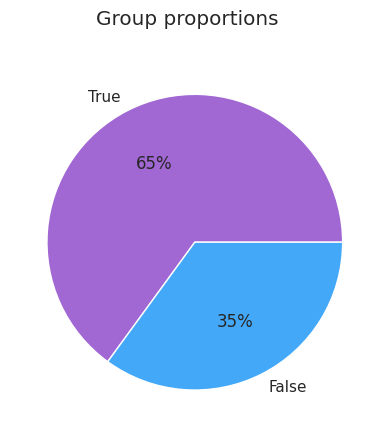

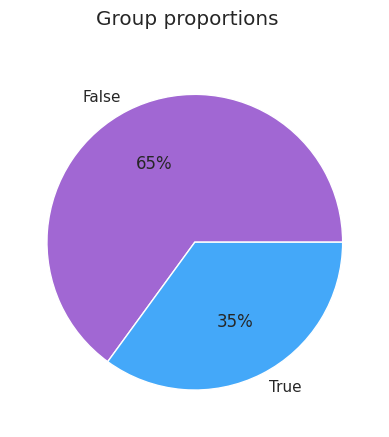

In [107]:
group_a = data['applicant_sex'].astype(bool)
group_b = ~data['applicant_sex'].astype(bool)
group_pie_plot(group_a)
group_pie_plot(group_b)

<Axes: >

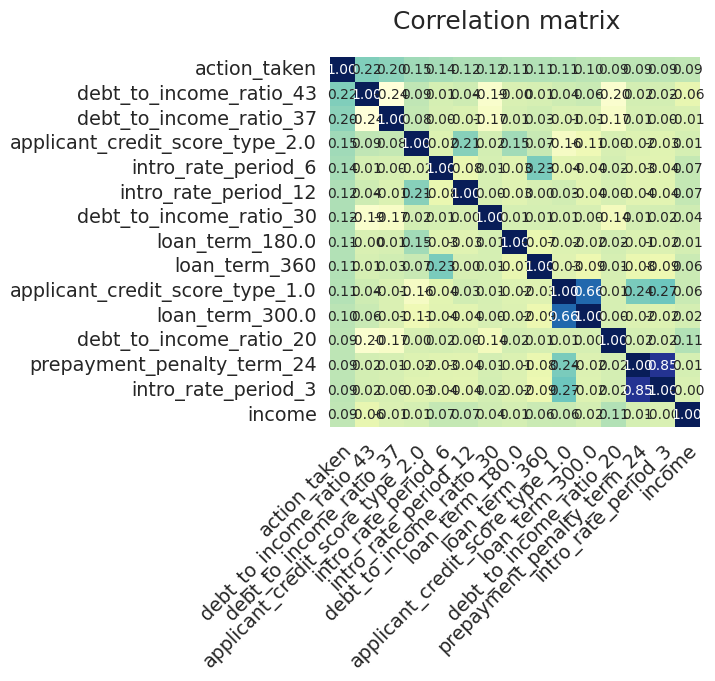

In [108]:
from holisticai.bias.plots import correlation_matrix_plot

correlation_matrix_plot(data, target_feature='action_taken', n_features=15)

In [109]:
from sklearn.model_selection import train_test_split

# Assuming 'action_taken' is the target variable


columns_with_na = data.columns[data.isna().any()].tolist()
X = data.drop(['action_taken','applicant_ethnicity'], axis=1)
y = data['action_taken']

# Split data into training and testing sets
X_train, X_test, y_train, y_test, group_a_tr, group_a_ts, group_b_tr, group_b_ts = train_test_split(X, y, group_a, group_b, test_size=0.2, random_state=42)

train_data = X_train, y_train, group_a_tr, group_b_tr
test_data  = X_test, y_test, group_a_ts, group_b_ts

In [110]:
columns_with_na

[]

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from holisticai.pipeline import Pipeline
from sklearn import metrics


metrics_dict={
        "Accuracy": metrics.accuracy_score,
        "Balanced accuracy": metrics.balanced_accuracy_score,
        "Precision": metrics.precision_score,
        "Recall": metrics.recall_score,
        "F1-Score": metrics.f1_score}


# efficacy metrics dataframe helper tool
def metrics_dataframe(y_pred, y_true, metrics_dict=metrics_dict):
    metric_list = [[pf, fn(y_true, y_pred)] for pf, fn in metrics_dict.items()]
    return pd.DataFrame(metric_list, columns=["Metric", "Value"]).set_index("Metric")


In [112]:
X_train, y_train, group_a_tr, group_b_tr = train_data

# Train a simple linear classification model
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000))
logistic_model.fit(X_train, y_train)

X_test, y_test, group_a_ts, group_b_ts = test_data

y_pred = logistic_model.predict(X_test)

y_proba = logistic_model.predict_proba(X)
y_score = y_proba[:,1]
y_true = y


# Calculate the accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

Logistic Regression Accuracy: 0.7857


In [113]:
print(report)

              precision    recall  f1-score   support

     Class 0       0.83      0.72      0.77      5315
     Class 1       0.75      0.85      0.80      5373

    accuracy                           0.79     10688
   macro avg       0.79      0.79      0.78     10688
weighted avg       0.79      0.79      0.78     10688



In [114]:
metrics_dataframe(y_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.785741
Balanced accuracy,0.785373
Precision,0.753328
Recall,0.853155
F1-Score,0.800140


In [115]:
from holisticai.bias.metrics import classification_bias_metrics

print(group_a.shape, group_b.shape, y_pred.shape)
df = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    y_pred,
    y_test,
    metric_type='both'
)
y_baseline = y_pred.copy()
df_baseline=df.copy()
df_baseline

(53440,) (53440,) (10688,)


,Value,Reference
Metric,,
Statistical Parity,0.024976,0
Disparate Impact,1.045153,1
Four Fifths Rule,0.956798,1
Cohen D,0.050453,0
2SD Rule,2.489305,0
Equality of Opportunity Difference,0.014516,0
False Positive Rate Difference,-0.004417,0
Average Odds Difference,0.005049,0
Accuracy Difference,0.014147,0


In [116]:
from holisticai.bias.mitigation import EqualizedOdds

In [117]:
model = LogisticRegression()
pipeline = Pipeline(
    steps=[
        ('scalar', StandardScaler()),
        ("estimator", LogisticRegression()),
        ("bm_posprocessing", EqualizedOdds(solver='highs', seed=42)),
        ]
    )

X_train, y_train, group_a_tr, group_b_tr = train_data
fit_params = {
    "bm__group_a": group_a_tr,
    "bm__group_b": group_b_tr
}

pipeline.fit(X_train, y_train, **fit_params)

X_test, y_test, group_a_ts, group_b_ts = test_data
predict_params = {
    "bm__group_a": group_a_ts,
    "bm__group_b": group_b_ts,
}
y_pred = pipeline.predict(X_test, **predict_params)
df = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    y_pred,
    y_test,
    metric_type='both'
)
df_eq_odds_w_p = df.copy()
df_eq_odds_w_p

,Value,Reference
Metric,,
Statistical Parity,0.020038,0
Disparate Impact,1.035915,1
Four Fifths Rule,0.965330,1
Cohen D,0.040492,0
2SD Rule,1.998061,0
Equality of Opportunity Difference,0.016181,0
False Positive Rate Difference,-0.015467,0
Average Odds Difference,0.000357,0
Accuracy Difference,0.020682,0


In [118]:
metrics_dataframe(y_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.783589
Balanced accuracy,0.783213
Precision,0.750737
Recall,0.852596
F1-Score,0.798431


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Generate and print the classification report
rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'])
print(rf_report)

Random Forest Accuracy: 0.8294348802395209
              precision    recall  f1-score   support

     Class 0       0.85      0.79      0.82      5315
     Class 1       0.81      0.87      0.84      5373

    accuracy                           0.83     10688
   macro avg       0.83      0.83      0.83     10688
weighted avg       0.83      0.83      0.83     10688



In [120]:
metrics_dataframe(rf_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.829435
Balanced accuracy,0.829229
Precision,0.807732
Recall,0.867113
F1-Score,0.836370


In [121]:
df_rf = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    rf_pred,
    y_test,
    metric_type='both'
)
rf_baseline = rf_pred.copy()
df_rf_baseline=df_rf.copy()
df_rf_baseline

,Value,Reference
Metric,,
Statistical Parity,0.030160,0
Disparate Impact,1.057989,1
Four Fifths Rule,0.945190,1
Cohen D,0.060537,0
2SD Rule,2.986445,0
Equality of Opportunity Difference,0.024664,0
False Positive Rate Difference,-0.010116,0
Average Odds Difference,0.007274,0
Accuracy Difference,0.019923,0


In [122]:
model = rf_model = RandomForestClassifier(random_state=42)
pipeline = Pipeline(
    steps=[
        ("estimator", RandomForestClassifier()),
        ("bm_posprocessing", EqualizedOdds(solver='highs', seed=42)),
        ]
    )

X_train, y_train, group_a_tr, group_b_tr = train_data
fit_params = {
    "bm__group_a": group_a_tr,
    "bm__group_b": group_b_tr
}

pipeline.fit(X_train, y_train, **fit_params)

X_test, y_test, group_a_ts, group_b_ts = test_data
predict_params = {
    "bm__group_a": group_a_ts,
    "bm__group_b": group_b_ts,
}
rf_pred = pipeline.predict(X_test, **predict_params)
df = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    rf_pred,
    y_test,
    metric_type='both'
)
df_eq_odds_w_p = df.copy()
df_eq_odds_w_p

,Value,Reference
Metric,,
Statistical Parity,0.036784,0
Disparate Impact,1.070979,1
Four Fifths Rule,0.933725,1
Cohen D,0.073877,0
2SD Rule,3.643808,0
Equality of Opportunity Difference,0.034968,0
False Positive Rate Difference,-0.006810,0
Average Odds Difference,0.014079,0
Accuracy Difference,0.023485,0


In [123]:
metrics_dataframe(rf_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.827751
Balanced accuracy,0.827532
Precision,0.804798
Recall,0.867858
F1-Score,0.835139


In [124]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with preprocessing and the MLP model
# StandardScaler is used to scale the data for better performance of the MLP
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000,random_state=42, solver='sgd'))
x

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
mlp_pred = mlp_model.predict(X_test)

# Calculate the accuracy
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f'MLP Accuracy: {mlp_accuracy}')

# Generate and print the classification report
mlp_report = classification_report(y_test, mlp_pred, target_names=['Class 0', 'Class 1'])
print(mlp_report)


MLP Accuracy: 0.8145583832335329
              precision    recall  f1-score   support

     Class 0       0.83      0.78      0.81      5315
     Class 1       0.80      0.85      0.82      5373

    accuracy                           0.81     10688
   macro avg       0.82      0.81      0.81     10688
weighted avg       0.82      0.81      0.81     10688



In [125]:
df_mlp = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    mlp_pred,
    y_test,
    metric_type='both'
)
mlp_baseline = mlp_pred.copy()
df_mlp_baseline=df_mlp.copy()
df_mlp_baseline

,Value,Reference
Metric,,
Statistical Parity,0.028097,0
Disparate Impact,1.054440,1
Four Fifths Rule,0.948371,1
Cohen D,0.056347,0
2SD Rule,2.779930,0
Equality of Opportunity Difference,0.027819,0
False Positive Rate Difference,-0.015184,0
Average Odds Difference,0.006318,0
Accuracy Difference,0.023675,0


In [126]:
metrics_dataframe(mlp_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.814558
Balanced accuracy,0.814381
Precision,0.796883
Recall,0.847013
F1-Score,0.821184


In [127]:
model = mlp_model = MLPClassifier(max_iter=1000,random_state=42, solver='sgd')
pipeline = Pipeline(
    steps=[
        ('scalar', StandardScaler()),
        ("estimator", MLPClassifier()),
        ("bm_posprocessing", EqualizedOdds(solver='highs', seed=42)),
        ]
    )

X_train, y_train, group_a_tr, group_b_tr = train_data
fit_params = {
    "bm__group_a": group_a_tr,
    "bm__group_b": group_b_tr
}

pipeline.fit(X_train, y_train, **fit_params)

X_test, y_test, group_a_ts, group_b_ts = test_data
predict_params = {
    "bm__group_a": group_a_ts,
    "bm__group_b": group_b_ts,
}
mlp_pred = pipeline.predict(X_test, **predict_params)
df = classification_bias_metrics(
    group_a_ts,
    group_b_ts,
    mlp_pred,
    y_test,
    metric_type='both'
)
df_eq_odds_w_p = df.copy()
df_eq_odds_w_p

,Value,Reference
Metric,,
Statistical Parity,0.030958,0
Disparate Impact,1.058445,1
Four Fifths Rule,0.944782,1
Cohen D,0.062253,0
2SD Rule,3.071044,0
Equality of Opportunity Difference,0.017881,0
False Positive Rate Difference,0.000999,0
Average Odds Difference,0.009440,0
Accuracy Difference,0.011670,0


In [128]:
metrics_dataframe(mlp_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.808103
Balanced accuracy,0.807841
Precision,0.782675
Recall,0.855946
F1-Score,0.817673
